# GRADED ASSIGNMENT ON
## 771768 - Introduction to Programming for Artificial Intelligence and Data Science

#### EXERCISE 1

In [1]:
# Data Processing
import csv #To import python csv module
import json #To import python csv module

In [2]:
(r'C:\Users\44782\Downloads\acw_user_data.csv')

'C:\\Users\\44782\\Downloads\\acw_user_data.csv'

In [3]:
# ', '. using join removes the ugly square brackets in each row for better visuals.
with open (r'C:\Users\44782\Downloads\acw_user_data.csv') as acw_user_data:
    csv_reader=csv.reader(acw_user_data)
    for line in csv_reader:
         print(', '.join(line))

Address Street, Address City, Address Postcode, Age (Years), Distance Commuted to Work (miles), Employer Company, Credit Card Start Date, Credit Card Expiry Date, Credit Card Number, Credit Card CVV, Dependants, First Name, Bank IBAN, Last Name, Marital Status, Yearly Pension (Â£), Retired, Yearly Salary (Â£), Sex, Vehicle Make, Vehicle Model, Vehicle Year, Vehicle Type
70 Lydia isle, Lake Conor, S71 7XZ, 89, 0, N/A, 08/18, 11/27, 676373692463, 875, 3, Kieran, GB62PQKB71416034141571, Wilson, married or civil partner, 7257, True, 72838, Male, Hyundai, Bonneville, 2009, Pickup
00 Wheeler wells, Chapmanton, L2 7BT, 46, 13.72, Begum-Williams, 08/12, 11/26, 4529436854129855, 583, 1, Jonathan, GB37UMCO54540228728019, Thomas, married or civil partner, 0, False, 54016, Male, Nissan, ATS, 1996, Coupe
Studio 33K Joel walk, Randallborough, ME3N 1GH, 22, 16.02, Hill-Wright, 11/19, 07/27, 4091726363083888495, 422, 1, Antony, GB40CVUE84011545859591, Jones, married or civil partner, 0, False, 68049, 

#### EXERCISE 2

In [4]:
try:
    acw_user_data = []
    dependent_error_rows = []
    with open(r'C:\Users\44782\Downloads\acw_user_data.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        for line_number, line_data in enumerate(csv_reader):
            if line_number == 0:
                continue
            user_data = {}
            user_data['Address'] = {
                'street': line_data[0],
                'city': line_data[1],
                'postcode': line_data[2],
            }
            user_data['age'] = int(line_data[3])
            user_data['commute_distance'] = float(line_data[4])
            user_data['company'] = line_data[5]
            user_data['Credit Card'] = {
                'start_date': line_data[6],
                'end_date': line_data[7],
                'number': int(line_data[8]),
                'cvv': int(line_data[9]),
                'iban': line_data[12]
            }
            
            if not line_data[10].strip():
                user_data['dependents'] = 0
                dependent_error_rows.append(line_number)
            else:
                user_data['dependents'] = int(line_data[10])
            
            user_data['first_name'] = line_data[11]
            user_data['last_name'] = line_data[13]
            user_data['marital_status'] = line_data[14]
            user_data['pension'] = float(line_data[15])
            user_data['retired'] = True if line_data[16].lower() == 'true' else False
            user_data['salary'] = float(line_data[17])
            user_data['sex'] = line_data[18]
            user_data['Vehicle'] = {
                'make': line_data[19],
                'model': line_data[20],
                'year': line_data[21],
                'category': line_data[22],
            }
            
            acw_user_data.append(user_data)
    with open('./processed.json', mode='w') as jsonFile:
        json.dump(acw_user_data, jsonFile)
            
except Exception as msg:
    print('There is a problem with your operations')
    print(f'Error: {msg}')

In [5]:
acw_user_data

[{'Address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'postcode': 'S71 7XZ'},
  'age': 89,
  'commute_distance': 0.0,
  'company': 'N/A',
  'Credit Card': {'start_date': '08/18',
   'end_date': '11/27',
   'number': 676373692463,
   'cvv': 875,
   'iban': 'GB62PQKB71416034141571'},
  'dependents': 3,
  'first_name': 'Kieran',
  'last_name': 'Wilson',
  'marital_status': 'married or civil partner',
  'pension': 7257.0,
  'retired': True,
  'salary': 72838.0,
  'sex': 'Male',
  'Vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': '2009',
   'category': 'Pickup'}},
 {'Address': {'street': '00 Wheeler wells',
   'city': 'Chapmanton',
   'postcode': 'L2 7BT'},
  'age': 46,
  'commute_distance': 13.72,
  'company': 'Begum-Williams',
  'Credit Card': {'start_date': '08/12',
   'end_date': '11/26',
   'number': 4529436854129855,
   'cvv': 583,
   'iban': 'GB37UMCO54540228728019'},
  'dependents': 1,
  'first_name': 'Jonathan',
  'last_name': 'Thomas',
  'marital_s

#### EXERCISE 3

In [6]:
print ("Problematic rows for dependants are rows number:{}".format(dependent_error_rows))

Problematic rows for dependants are rows number:[22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


#### EXERCISE 4

In [7]:
with open('processed.json', 'w') as json_file: # context manager
    json.dump(acw_user_data, json_file)

#### EXERCISE 5

In [8]:
employed = []
retired = []

for user in acw_user_data:
    if user['retired'] == True:
        retired.append(user)
    else:
        employed.append(user)

with open('./retired.json', mode='w') as jsonFile:
    json.dump(retired, jsonFile)
        
with open('./employed.json', mode='w') as jsonFile:
    json.dump(employed, jsonFile)

In [9]:
retired[:1]

[{'Address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'postcode': 'S71 7XZ'},
  'age': 89,
  'commute_distance': 0.0,
  'company': 'N/A',
  'Credit Card': {'start_date': '08/18',
   'end_date': '11/27',
   'number': 676373692463,
   'cvv': 875,
   'iban': 'GB62PQKB71416034141571'},
  'dependents': 3,
  'first_name': 'Kieran',
  'last_name': 'Wilson',
  'marital_status': 'married or civil partner',
  'pension': 7257.0,
  'retired': True,
  'salary': 72838.0,
  'sex': 'Male',
  'Vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': '2009',
   'category': 'Pickup'}}]

In [10]:
employed[:1]

[{'Address': {'street': '00 Wheeler wells',
   'city': 'Chapmanton',
   'postcode': 'L2 7BT'},
  'age': 46,
  'commute_distance': 13.72,
  'company': 'Begum-Williams',
  'Credit Card': {'start_date': '08/12',
   'end_date': '11/26',
   'number': 4529436854129855,
   'cvv': 583,
   'iban': 'GB37UMCO54540228728019'},
  'dependents': 1,
  'first_name': 'Jonathan',
  'last_name': 'Thomas',
  'marital_status': 'married or civil partner',
  'pension': 0.0,
  'retired': False,
  'salary': 54016.0,
  'sex': 'Male',
  'Vehicle': {'make': 'Nissan',
   'model': 'ATS',
   'year': '1996',
   'category': 'Coupe'}}]

#### EXERCISE 6

In [11]:
expired_card = []
working_card = []

for user in acw_user_data:
    start_date = user['Credit Card']['start_date']
    expiry_date = user['Credit Card']['end_date']
    
    start_year = int(start_date.split('/')[1])
    end_year = int(expiry_date.split('/')[1])
    
    if (end_year - start_year) > 10:
        expired_card.append(user)
    else:
        working_card.append(user)
        
with open('./remove_ccard.json', mode='w') as jsonFile:
    json.dump(expired_card, jsonFile)
with open('./working_ccard.json', mode='w') as jsonFile:
    json.dump(working_card, jsonFile)

In [12]:
def shouldRemoveCard(data_row, start_index, end_index):
    start_date = data_row[start_index]
    end_date = data_row[end_index]
    
    start_year = int(start_date.split('/')[1])
    end_year = int(end_date.split('/')[1])
    
    return (end_year - start_year) > 10

In [13]:
working_card

[{'Address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'postcode': 'S71 7XZ'},
  'age': 89,
  'commute_distance': 0.0,
  'company': 'N/A',
  'Credit Card': {'start_date': '08/18',
   'end_date': '11/27',
   'number': 676373692463,
   'cvv': 875,
   'iban': 'GB62PQKB71416034141571'},
  'dependents': 3,
  'first_name': 'Kieran',
  'last_name': 'Wilson',
  'marital_status': 'married or civil partner',
  'pension': 7257.0,
  'retired': True,
  'salary': 72838.0,
  'sex': 'Male',
  'Vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': '2009',
   'category': 'Pickup'}},
 {'Address': {'street': 'Studio 33K Joel walk',
   'city': 'Randallborough',
   'postcode': 'ME3N 1GH'},
  'age': 22,
  'commute_distance': 16.02,
  'company': 'Hill-Wright',
  'Credit Card': {'start_date': '11/19',
   'end_date': '07/27',
   'number': 4091726363083888495,
   'cvv': 422,
   'iban': 'GB40CVUE84011545859591'},
  'dependents': 1,
  'first_name': 'Antony',
  'last_name': 'Jones',
  'ma

In [14]:
expired_card

[{'Address': {'street': '00 Wheeler wells',
   'city': 'Chapmanton',
   'postcode': 'L2 7BT'},
  'age': 46,
  'commute_distance': 13.72,
  'company': 'Begum-Williams',
  'Credit Card': {'start_date': '08/12',
   'end_date': '11/26',
   'number': 4529436854129855,
   'cvv': 583,
   'iban': 'GB37UMCO54540228728019'},
  'dependents': 1,
  'first_name': 'Jonathan',
  'last_name': 'Thomas',
  'marital_status': 'married or civil partner',
  'pension': 0.0,
  'retired': False,
  'salary': 54016.0,
  'sex': 'Male',
  'Vehicle': {'make': 'Nissan',
   'model': 'ATS',
   'year': '1996',
   'category': 'Coupe'}},
 {'Address': {'street': '24 Heather locks',
   'city': 'New Mathew',
   'postcode': 'WD10 1LX'},
  'age': 43,
  'commute_distance': 20.05,
  'company': 'Clark Group',
  'Credit Card': {'start_date': '07/12',
   'end_date': '03/29',
   'number': 36970652008212,
   'cvv': 622,
   'iban': 'GB92PWOB18937027850061'},
  'dependents': 3,
  'first_name': 'Julian',
  'last_name': 'Potter',
  'mari

#### EXERCISE 7 A

In [15]:
try:
    processed_data = []
    new_processed_data = []
    with open('./processed.json', mode='r') as file:
        processed_data = json.load(file)
        
    for data in processed_data:
        if data['commute_distance'] <= 1:
            data['salary_commute'] = data['salary']
        else:
            data['salary_commute'] = data['salary'] * data['commute_distance']
        
        new_processed_data.append(data)
        

    new_processed_data.sort(key=lambda data : data['salary_commute'])
    
    with open('./commute.json', mode='w') as jsonFile:
        json.dump(new_processed_data, jsonFile)
            
except Exception as msg:
    print('There is a problem with your operations')
    print(msg)

In [16]:
try:
    users_data = pd.read_csv('./acw_user_data.csv')
    salary_data = users_data['Yearly Salary (£)']
    age_data = users_data['Age (Years)']

    print(f'Mean Salary: {salary_data.mean()}')
    print(f'Median Age: {age_data.median()}')
except Exception as msg:
    print('There is a problem with your operations')
    print(msg)

There is a problem with your operations
name 'pd' is not defined


#### EXERCISE 7 B

In [17]:
# Adoptation of Lambda anonymous function
new_processed_data.append(data)
new_processed_data.sort(key=lambda data : data['salary_commute'])
new_processed_data

[{'Address': {'street': 'Flat 86 Abigail mount',
   'city': 'North Emilystad',
   'postcode': 'G0F 8GG'},
  'age': 89,
  'commute_distance': 0.0,
  'company': 'N/A',
  'Credit Card': {'start_date': '04/20',
   'end_date': '08/22',
   'number': 4449413745622080,
   'cvv': 32,
   'iban': 'GB20YNUQ40766287388345'},
  'dependents': 2,
  'first_name': 'Carly',
  'last_name': 'Lloyd',
  'marital_status': 'single',
  'pension': 14877.0,
  'retired': True,
  'salary': 17080.0,
  'sex': 'Female',
  'Vehicle': {'make': 'Audi',
   'model': 'MR2',
   'year': '1993',
   'category': 'SUV'},
  'salary_commute': 17080.0},
 {'Address': {'street': 'Studio 50 Little points',
   'city': 'New Leslie',
   'postcode': 'KT9 4XX'},
  'age': 91,
  'commute_distance': 0.0,
  'company': 'N/A',
  'Credit Card': {'start_date': '12/12',
   'end_date': '05/13',
   'number': 2720322671354499,
   'cvv': 72,
   'iban': 'GB53DVFV06036495201688'},
  'dependents': 3,
  'first_name': 'Justin',
  'last_name': 'Martin',
  'ma

#### EXERCISE 7 C

In [18]:
with open('commute.json', 'w') as commute_file:
    json.dump(acw_user_data, commute_file)

#### DATA VISUALISATION

In [19]:
import pandas as pd
import seaborn as seb

In [20]:
df=pd.read_csv(r'C:\Users\44782\Downloads\acw_user_data.csv')
    

In [21]:
df

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (£),Retired,Yearly Salary (£),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Studio 6 Heather prairie,North Amelia,E9 0HB,48,18.44,Phillips-Pope,04/19,08/26,3563802099155576,908,...,Clark,married or civil partner,0,False,84645,Male,Saturn,Convertible,2015,Van/Minivan
996,Flat 3 Davies run,Greenshire,E7 4UJ,22,19.61,Hughes LLC,05/12,07/28,3591311819315276,675,...,Jones,married or civil partner,0,False,93314,Female,Toyota,Yukon,2015,Van/Minivan
997,Flat 7 Barber motorway,Burrowsshire,L62 8TA,38,6.66,Bailey Group,01/13,05/29,3584931475767707,679,...,Walker,single,0,False,20940,Female,Ford,S6,2020,Sedan
998,00 Tony forks,Abbiebury,NP4 1JL,45,18.13,Foster-Price,04/19,05/23,4090311300716168,775,...,Thomson,married or civil partner,0,False,82412,Male,Scion,Ram 1500 Quad Cab,2015,Pickup


In [22]:
df.describe()

,Age (Years),Distance Commuted to Work (miles),Credit Card Number,Credit Card CVV,Dependants,Yearly Pension (£),Yearly Salary (£),Vehicle Year
count,1000.000000,1000.000000,1.000000e+03,1000.000000,981.000000,1000.000000,1000.000000,1000.000000
mean,54.302000,10.457770,4.188020e+17,932.482000,2.135576,5875.413000,57814.078000,2006.927000
std,21.319646,6.951997,1.304208e+18,1626.125269,0.977799,10986.507761,23270.417139,8.211035
min,18.000000,0.000000,6.041600e+10,2.000000,1.000000,0.000000,17046.000000,1992.000000
25%,36.000000,5.637500,3.857314e+13,277.000000,1.000000,0.000000,39089.750000,2000.000000
50%,54.000000,12.170000,3.510666e+15,559.500000,2.000000,0.000000,57518.000000,2008.000000
75%,72.000000,16.262500,4.635909e+15,833.250000,3.000000,0.000000,77211.500000,2014.000000
max,91.000000,20.340000,4.967327e+18,9977.000000,5.000000,46117.000000,98915.000000,2020.000000


In [23]:
df.describe()

,Age (Years),Distance Commuted to Work (miles),Credit Card Number,Credit Card CVV,Dependants,Yearly Pension (£),Yearly Salary (£),Vehicle Year
count,1000.000000,1000.000000,1.000000e+03,1000.000000,981.000000,1000.000000,1000.000000,1000.000000
mean,54.302000,10.457770,4.188020e+17,932.482000,2.135576,5875.413000,57814.078000,2006.927000
std,21.319646,6.951997,1.304208e+18,1626.125269,0.977799,10986.507761,23270.417139,8.211035
min,18.000000,0.000000,6.041600e+10,2.000000,1.000000,0.000000,17046.000000,1992.000000
25%,36.000000,5.637500,3.857314e+13,277.000000,1.000000,0.000000,39089.750000,2000.000000
50%,54.000000,12.170000,3.510666e+15,559.500000,2.000000,0.000000,57518.000000,2008.000000
75%,72.000000,16.262500,4.635909e+15,833.250000,3.000000,0.000000,77211.500000,2014.000000
max,91.000000,20.340000,4.967327e+18,9977.000000,5.000000,46117.000000,98915.000000,2020.000000


#### EXERCISE 1 A

In [24]:
salary=df['Yearly Salary (£)']
print(salary)
print(type(salary))

0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (£), Length: 1000, dtype: int64
<class 'pandas.core.series.Series'>


In [25]:
#With the use of F-Strings
print(f"The Mean Salary is: {salary.mean()}")

The Mean Salary is: 57814.078


#### EXERCISE 1 B

In [26]:
age = df['Age (Years)']
print(age)
print(type(age))

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64
<class 'pandas.core.series.Series'>


In [27]:
print(f"The Median Age is: {age.median()}")

The Median Age is: 54.0


#### EXERCISE 2 A

In [28]:
max_age=age.max()
min_age=age.min()
bins=(max_age - min_age )/5
round(bins)

15

<class 'seaborn.axisgrid.FacetGrid'>


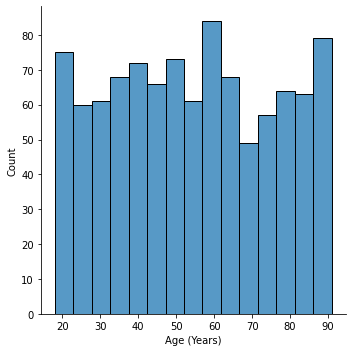

In [29]:
age_displot=seb.displot(df['Age (Years)'], bins=15)
print(type(age_displot))

#### EXERCISE 2 B

<class 'seaborn.axisgrid.FacetGrid'>


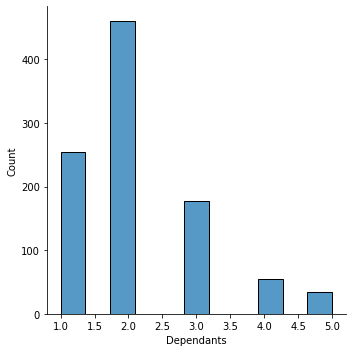

In [30]:
dependants_displot=seb.displot(data=df,x='Dependants')
print(type(dependants_displot))

#### EXERCISE 2 C

<class 'seaborn.axisgrid.FacetGrid'>


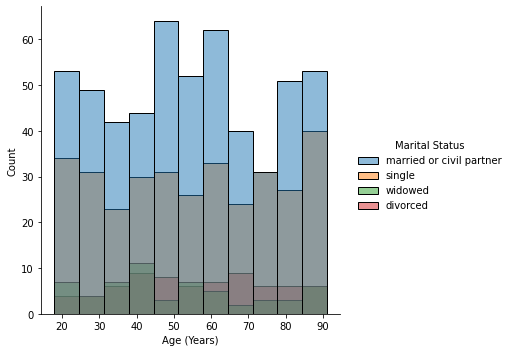

In [31]:
age_cond_displot=seb.displot(data=df, x='Age (Years)', hue='Marital Status')
print(type(age_cond_displot))

##### EXERCISE 3 A

<class 'matplotlib.axes._subplots.AxesSubplot'>


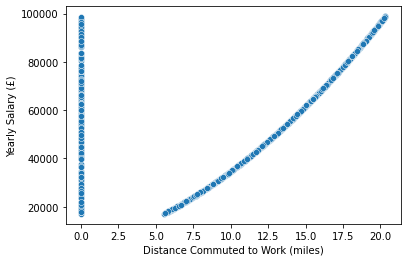

In [32]:
scatter_handle=seb.scatterplot(data=df, x='Distance Commuted to Work (miles)', y='Yearly Salary (£)')
print(type(scatter_handle))

#### EXERCISE 3 B

<class 'matplotlib.axes._subplots.AxesSubplot'>


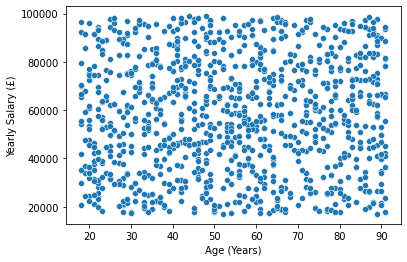

In [33]:
scatter_plt=seb.scatterplot(data=df, x='Age (Years)', y='Yearly Salary (£)')
print(type(scatter_plt))

#### EXERCISE 3 C

<class 'matplotlib.axes._subplots.AxesSubplot'>


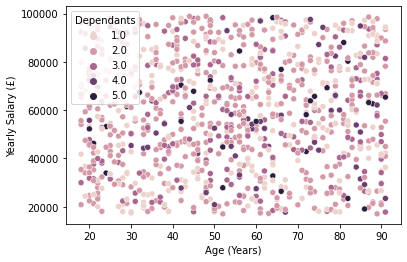

In [34]:
scatter_cond_plt=seb.scatterplot(data=df, x='Age (Years)', y='Yearly Salary (£)', hue='Dependants')
print(type(scatter_cond_plt))

#### EXERCISE 4

In [35]:
age_displot.savefig('Displot 1.png')
dependants_displot.savefig('Displot 2.png')
age_cond_displot.savefig('Displot 3.png')
scatter_handle.get_figure().savefig('scatter plot 1.png')
scatter_plt.get_figure().savefig('scatter plot 2.png')
scatter_cond_plt.get_figure().savefig('scatter plot 3.png')